<a href="https://colab.research.google.com/github/SriVidyaYeluripati/SITTA/blob/Vidya/SITTA_implmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


Kaggle credentials set.
Kaggle credentials successfully validated.


In [2]:
from IPython import get_ipython
from IPython.display import display

yeluripatisrividya_plant_pathology_sitta_path = kagglehub.dataset_download('yeluripatisrividya/plant-pathology-sitta')

100%|██████████| 779M/779M [00:06<00:00, 118MB/s] 

Extracting files...


In [3]:
print(yeluripatisrividya_plant_pathology_sitta_path)

/root/.cache/kagglehub/datasets/yeluripatisrividya/plant-pathology-sitta/versions/1


In [4]:
!ls -l

total 4
drwxr-xr-x 1 root root 4096 Mar  4 14:26 sample_data


In [5]:
!pip install torch torchvision numpy pyyaml opencv-python matplotlib tqdm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 98.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 88.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 56.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 36.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 83.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitl

In [6]:
!pip install torch-fidelity lpips

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 kB 4.8 MB/s eta 0:00:00


In [7]:
!git clone https://github.com/SriVidyaYeluripati/SITTA.git -b Vidya

Cloning into 'SITTA'...
remote: Enumerating objects: 64, done.
remote: Counting objects: 100% (64/64), done.
remote: Compressing objects: 100% (63/63), done.
remote: Total 64 (delta 32), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (64/64), 791.16 KiB | 4.02 MiB/s, done.
Resolving deltas: 100% (32/32), done.


In [8]:
%cd /root/.cache/kagglehub/datasets/yeluripatisrividya/plant-pathology-sitta/versions/1/images

/root/.cache/kagglehub/datasets/yeluripatisrividya/plant-pathology-sitta/versions/1/images


# Step 2: Dataset Preparation

In [9]:
import os
import shutil
import random
import glob

# Define dataset paths
dataset_path = "/root/.cache/kagglehub/datasets/yeluripatisrividya/plant-pathology-sitta/versions/1/images"
output_dir = "/kaggle/working/dataset"

# Create required directories
os.makedirs(f"{output_dir}/leaves/trainA", exist_ok=True)
os.makedirs(f"{output_dir}/leaves/testA", exist_ok=True)
os.makedirs(f"{output_dir}/leaves/trainB", exist_ok=True)
os.makedirs(f"{output_dir}/leaves/testB", exist_ok=True)

# Get all image files
all_images = glob.glob(f"{dataset_path}/*.jpg")
random.shuffle(all_images)

# Split into 80% train, 20% test
split_idx = int(0.8 * len(all_images))
trainA_images = all_images[:split_idx]
testA_images = all_images[split_idx:]

# Copy images to trainA/testA
for img in trainA_images:
    shutil.copy(img, f"{output_dir}/leaves/trainA/")

for img in testA_images:
    shutil.copy(img, f"{output_dir}/leaves/testA/")

# Select 200 random images as "textures" for trainB
num_textures = min(200, len(trainA_images))
trainB_images = random.sample(trainA_images, num_textures)

# Move them to trainB (simulating textures)
for img in trainB_images:
    shutil.copy(img, f"{output_dir}/leaves/trainB/")

# Move 10% of trainB to testB
testB_size = int(0.1 * len(trainB_images))
testB_images = trainB_images[:testB_size]

for img in testB_images:
    shutil.copy(img, f"{output_dir}/leaves/testB/")

print("✅ Dataset structured successfully!")

✅ Dataset structured successfully!


In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Step 3: Resize Images

In [11]:
from PIL import Image
import os
import glob

# Define input and output directories
dataset_dirs = ["trainA", "testA", "trainB", "testB"]
base_dir = "/kaggle/working/dataset/leaves"

# Target size
TARGET_SIZE = (288, 288)

for dataset in dataset_dirs:
    input_folder = os.path.join(base_dir, dataset)
    resized_folder = os.path.join(base_dir, f"{dataset}_resized")
    os.makedirs(resized_folder, exist_ok=True)

    # Resize all images
    for img_path in glob.glob(input_folder + "/*.jpg"):
        img = Image.open(img_path).convert("RGB")  # Convert to RGB format
        img = img.resize(TARGET_SIZE, Image.BICUBIC)  # Bicubic interpolation
        img.save(os.path.join(resized_folder, os.path.basename(img_path)))

    print(f"✅ Resized images saved in {resized_folder}")

print("🔥 All images resized successfully!")

✅ Resized images saved in /kaggle/working/dataset/leaves/trainA_resized
✅ Resized images saved in /kaggle/working/dataset/leaves/testA_resized
✅ Resized images saved in /kaggle/working/dataset/leaves/trainB_resized
✅ Resized images saved in /kaggle/working/dataset/leaves/testB_resized
🔥 All images resized successfully!


# Step 4: Update YAML

In [12]:
import yaml

# Load the YAML file
yaml_path = "/content/SITTA/configs/single2single.yaml"
with open(yaml_path, "r") as file:
    config = yaml.safe_load(file)

config["trainA_dir"] = "/kaggle/working/dataset/leaves/trainA_resized"
config["testA_dir"] = "/kaggle/working/dataset/leaves/testA_resized"
config["trainB_dir"] = "/kaggle/working/dataset/leaves/trainB_resized"
config["testB_dir"] = "/kaggle/working/dataset/leaves/testB_resized"

# Save updated YAML file
with open(yaml_path, "w") as file:
    yaml.dump(config, file)

print("✅ YAML updated successfully!")

✅ YAML updated successfully!


## DataLoaders

In [13]:
import os
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import torchvision.transforms as transforms

# Define dataset paths
dataset_path = "/kaggle/working/dataset/leaves"

transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),         # Randomly flip the image
    transforms.RandomResizedCrop(288, scale=(0.8, 1.0), ratio=(0.9, 1.1)),  # Random crop with resizing
    transforms.Resize((288, 288)),               # Ensure the final size is 288x288
    transforms.ToTensor(),
])


# Custom Dataset Class
class CustomImageDataset(Dataset):
    def __init__(self, image_dir, transform=None):
        self.image_dir = image_dir
        self.image_paths = [os.path.join(image_dir, fname) for fname in os.listdir(image_dir) if fname.endswith(('.jpg', '.png'))]
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        image = Image.open(img_path).convert("RGB")  # Convert to RGB format
        if self.transform:
            image = self.transform(image)
        return image  # Return only the image (No label since it's unsupervised)

# Load datasets using CustomImageDataset
trainA_dataset = CustomImageDataset(image_dir=f"{dataset_path}/trainA_resized", transform=transform)
trainB_dataset = CustomImageDataset(image_dir=f"{dataset_path}/trainB_resized", transform=transform)

# Create DataLoaders
trainA_loader = DataLoader(trainA_dataset, batch_size=1, shuffle=True)
trainB_loader = DataLoader(trainB_dataset, batch_size=1, shuffle=True)


print(f"✅ Loaded {len(trainA_dataset)} images in TrainA and {len(trainB_dataset)} images in TrainB")


✅ Loaded 2913 images in TrainA and 200 images in TrainB


# Step 5: SITTA Model Implementation (With PONO)
This includes:

PONO Normalization Layer
SITTA Generator (with and without PONO)
SITTA Discriminator

## 5.1: Define PONO Normalization

In [14]:
# ===============================================================
# Step 5: Full SITTA Model Implementation (Full Replication)
# ===============================================================

import torch
import torch.nn as nn
import torch.nn.functional as F

# 5.1: Define PONO Normalization (Positional Normalization)
class PONO(nn.Module):
    def __init__(self, eps=1e-5):
        super(PONO, self).__init__()
        self.eps = eps

    def forward(self, x):
        # x: [B, C, H, W]
        mean = x.mean(dim=1, keepdim=True)    # [B, 1, H, W]
        std = x.std(dim=1, keepdim=True)        # [B, 1, H, W]
        return (x - mean) / (std + self.eps), mean, std


##  5.2: Define SITTA Generator (With & Without PONO)

In [15]:

# 5.2: Define the Content Encoder
# This encoder extracts content features and, if enabled, uses PONO to compute positional stats (β and γ)
class ContentEncoder(nn.Module):
    def __init__(self, use_pono=True):
        super(ContentEncoder, self).__init__()
        self.use_pono = use_pono
        self.conv1 = nn.Sequential(
            nn.Conv2d(3, 32, 4, stride=2, padding=1),  # 288 -> 144
            nn.InstanceNorm2d(32),
            nn.ReLU(inplace=True)
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(32, 64, 4, stride=2, padding=1),  # 144 -> 72
            nn.InstanceNorm2d(64),
            nn.ReLU(inplace=True)
        )
        self.conv3 = nn.Sequential(
            nn.Conv2d(64, 128, 4, stride=2, padding=1), # 72 -> 36
            nn.InstanceNorm2d(128),
            nn.ReLU(inplace=True)
        )
        # Initialize PONO only if enabled.
        if self.use_pono:
            self.pono = PONO()
        else:
            self.pono = None
        # A residual block to refine content features
        self.res_block = nn.Sequential(
            nn.Conv2d(128, 128, 3, stride=1, padding=1),
            nn.InstanceNorm2d(128),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, 3, stride=1, padding=1),
            nn.InstanceNorm2d(128)
        )

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)  # Content features at 36x36
        if self.use_pono and self.pono is not None:
            x_norm, beta, gamma = self.pono(x)
        else:
            # If PONO is disabled, use default stats (beta zeros, gamma ones)
            beta = torch.zeros_like(x[:, :1, :, :])
            gamma = torch.ones_like(x[:, :1, :, :])
            x_norm = x
        x_res = self.res_block(x_norm)
        # Skip connection: add original x to refined features
        content_feature = x_res + x
        return content_feature, beta, gamma

# 5.2: Define the Texture Encoder
# This encoder extracts texture latent features from the texture image.
class TextureEncoder(nn.Module):
    def __init__(self):
        super(TextureEncoder, self).__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(3, 32, 4, stride=2, padding=1),  # 288 -> 144
            nn.InstanceNorm2d(32),
            nn.ReLU(inplace=True)
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(32, 64, 4, stride=2, padding=1),  # 144 -> 72
            nn.InstanceNorm2d(64),
            nn.ReLU(inplace=True)
        )
        self.conv3 = nn.Sequential(
            nn.Conv2d(64, 128, 4, stride=2, padding=1), # 72 -> 36
            nn.InstanceNorm2d(128),
            nn.ReLU(inplace=True)
        )

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        texture_feature = self.conv3(x)
        return texture_feature

# 5.2: Define the Decoder with Positional Re-injection
# This decoder combines content and texture features and re-injects the positional stats (β and γ)
class Decoder(nn.Module):
    def __init__(self):
        super(Decoder, self).__init__()
        # First deconvolution upsamples from 36x36 to 72x72
        self.deconv1 = nn.Sequential(
            nn.ConvTranspose2d(256, 128, 4, stride=2, padding=1),  # 36 -> 72
            nn.InstanceNorm2d(128),
            nn.ReLU(inplace=True)
        )
        # Second deconvolution upsamples from 72x72 to 144x144
        self.deconv2 = nn.Sequential(
            nn.ConvTranspose2d(128, 64, 4, stride=2, padding=1),   # 72 -> 144
            nn.InstanceNorm2d(64),
            nn.ReLU(inplace=True)
        )
        # Third deconvolution upsamples from 144x144 to 288x288
        self.deconv3 = nn.Sequential(
            nn.ConvTranspose2d(64, 3, 4, stride=2, padding=1),     # 144 -> 288
            nn.Tanh()
        )

    def forward(self, content_feature, texture_feature, beta, gamma):
        # Concatenate content and texture features (channel dim)
        combined = torch.cat([content_feature, texture_feature], dim=1)  # [B, 256, 36, 36]
        out = self.deconv1(combined)
        # Re-inject positional stats: upsample beta and gamma to current size and modulate.
        beta_up = F.interpolate(beta, size=out.shape[2:], mode='bilinear', align_corners=False)
        gamma_up = F.interpolate(gamma, size=out.shape[2:], mode='bilinear', align_corners=False)
        out = out * gamma_up + beta_up

        out = self.deconv2(out)
        beta_up = F.interpolate(beta, size=out.shape[2:], mode='bilinear', align_corners=False)
        gamma_up = F.interpolate(gamma, size=out.shape[2:], mode='bilinear', align_corners=False)
        out = out * gamma_up + beta_up

        out = self.deconv3(out)
        return out

# 5.2: Define the Full SITTA Generator (Using Separate Encoders)
# Now it accepts a flag 'use_pono' to control whether PONO is used in the content encoder.
class SITTA_Generator_Full(nn.Module):
    def __init__(self, use_pono=True):
        super(SITTA_Generator_Full, self).__init__()
        self.content_encoder = ContentEncoder(use_pono=use_pono)
        self.texture_encoder = TextureEncoder()
        self.decoder = Decoder()

    def forward(self, content_img, texture_img):
        # Extract content features (with or without PONO) and positional stats.
        content_feature, beta, gamma = self.content_encoder(content_img)
        # Extract texture latent features.
        texture_feature = self.texture_encoder(texture_img)
        # Decode the combined features into an output image.
        out = self.decoder(content_feature, texture_feature, beta, gamma)
        # Return generated image and texture latent feature (for KL loss, etc.)
        return out, texture_feature

# 5.3: Define the SITTA Discriminator
class SITTA_Discriminator(nn.Module):
    def __init__(self):
        super(SITTA_Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(3, 32, 3, stride=1, padding=1),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(32, 64, 3, stride=1, padding=1),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(64, 128, 3, stride=1, padding=1),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(128, 1, 3, stride=1, padding=1),
            nn.Sigmoid()
        )
    def forward(self, x):
        return self.model(x)



## 5.3: Define SITTA Discriminator

In [16]:
# 5.3: Define the SITTA Discriminator
class SITTA_Discriminator(nn.Module):
    def __init__(self):
        super(SITTA_Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(3, 32, 3, stride=1, padding=1),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(32, 64, 3, stride=1, padding=1),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(64, 128, 3, stride=1, padding=1),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(128, 1, 3, stride=1, padding=1),
            nn.Sigmoid()
        )
    def forward(self, x):
        return self.model(x)


## 5.4: Initialize Models

In [17]:
# 5.4: Initialize Full SITTA Models
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR

lr_g = 0.0005
lr_d = 0.0005
beta1 = 0.5
beta2 = 0.999
step_size = 1000
gamma = 0.1

# Loss weights (for later use in training)
gan_w = 1       # adversarial loss weight
idt_w = 5       # identity loss weight (if used)
cycle_w = 10    # cycle consistency (latent regression) loss weight
vgg_w = 1       # VGG perceptual loss weight

# Instantiate full SITTA generator with PONO (full replication)
full_generator_with_pono = SITTA_Generator_Full(use_pono=True).cuda()
# Instantiate full SITTA generator without PONO for comparison
full_generator_without_pono = SITTA_Generator_Full(use_pono=False).cuda()

# Initialize discriminator (shared across both variants for simplicity)
discriminator = SITTA_Discriminator().cuda()

print("✅ Full SITTA Generator (with & without PONO) and Discriminator initialized!")


✅ Full SITTA Generator (with & without PONO) and Discriminator initialized!


# Step 6: Training Function for SITTA (With & Without PONO)
✔ Includes:


* Adversarial Loss
* Cycle Consistency Loss
* Identity Loss
* Training Function
* Training Execution for both With & Without PONO

## 6.1: Define Loss Functions

In [18]:
# ===============================================================
# Step 6: Training Function for Full SITTA (Full Replication)
# ===============================================================

import time
import torch
import torch.nn as nn
import torch.optim as optim
from torch.cuda.amp import autocast, GradScaler
from torch.optim.lr_scheduler import StepLR
import os
import torch.nn.functional as F
import torchvision.models as models

# -------------------------
# Hyper-parameters (from paper)
# -------------------------
lr_g = 0.0005          # Generator learning rate
lr_d = 0.0005          # Discriminator learning rate
beta1 = 0.5
beta2 = 0.999
step_size = 1000       # Learning rate decay step
gamma = 0.1            # Decay factor
total_epochs = 300

# Loss weight multipliers
gan_w = 1              # Weight for adversarial loss
cycle_w = 10           # Weight for cycle (latent regression) loss
idt_w = 5              # Weight for identity loss
vgg_w = 1              # Weight for VGG perceptual loss
lambda_kl = 1.0        # Weight for KL divergence loss

# -------------------------
# Define Loss Functions
# -------------------------
cycle_loss_fn = nn.L1Loss()      # For cycle reconstruction
identity_loss_fn = nn.L1Loss()   # For identity mapping

# VGG Perceptual Loss as defined previously
class VGGLoss(nn.Module):
    def __init__(self):
        super(VGGLoss, self).__init__()
        # Use the first 16 layers of VGG19
        self.vgg = models.vgg19(pretrained=True).features[:16].eval()
        for param in self.vgg.parameters():
            param.requires_grad = False
        self.criterion = nn.L1Loss()

    def forward(self, generated, target):
        gen_features = self.vgg(generated)
        target_features = self.vgg(target).detach()
        return self.criterion(gen_features, target_features)

vgg_loss_fn = VGGLoss().cuda()

# KL divergence loss (using log-softmax on the generated latent and softmax on the real latent)
kl_loss_fn = nn.KLDivLoss(reduction='batchmean')

# -------------------------
# Initialize Optimizers and Schedulers
# -------------------------
optimizer_G = optim.Adam(full_generator_with_pono.parameters(), lr=lr_g, betas=(beta1, beta2))
optimizer_D = optim.Adam(discriminator.parameters(), lr=lr_d, betas=(beta1, beta2))

scheduler_G = StepLR(optimizer_G, step_size=step_size, gamma=gamma)
scheduler_D = StepLR(optimizer_D, step_size=step_size, gamma=gamma)

# For mixed precision training
scaler = GradScaler()

# Directory for saving checkpoints
checkpoint_dir = "/kaggle/working/checkpoints"
os.makedirs(checkpoint_dir, exist_ok=True)

print("✅ Optimizers, schedulers, and checkpoint directory initialized for full SITTA!")

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth
100%|██████████| 548M/548M [00:04<00:00, 138MB/s]


✅ Optimizers, schedulers, and checkpoint directory initialized for full SITTA!


<ipython-input-18-c7fde23737ba>:69: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()


## 6.2: Define Training Function

In [19]:


# -------------------------
# Training Loop Function for Full SITTA
# -------------------------
def train_sitta_full(generator, label, trainA_loader, trainB_loader, epochs=total_epochs):
    """
    Training function for the full SITTA generator (full replication version) using mixed precision.
    The full generator takes two inputs:
      - a content image (from trainA_loader) and
      - a texture image (from trainB_loader).

    Loss components include:
      - Adversarial loss (Wasserstein style)
      - Cycle (latent regression) loss: reconstruct content by using the same image as both content and texture
      - Identity loss: mapping texture image through generator should yield itself
      - KL divergence loss on the texture latent space (comparing texture features of real and generated images)
      - VGG perceptual loss: to preserve structural details.
    """
    print(f"🚀 Starting full SITTA training ({label}) for {epochs} epochs...")
    for epoch in range(epochs):
        start_time = time.time()
        epoch_gen_loss = 0.0
        epoch_disc_loss = 0.0
        num_batches = 0

        # Loop over both dataloaders (assuming they have the same length or using nested loops)
        for content_imgs, texture_imgs in zip(trainA_loader, trainB_loader):
            # Move data to GPU
            content_imgs, texture_imgs = content_imgs.cuda(), texture_imgs.cuda()

            with autocast():
                # -------------------------
                # Generator Forward Pass
                # -------------------------
                # Generate synthetic image by combining content from A and texture from B.
                fake_img, _ = generator(content_imgs, texture_imgs)

                # -------------------------
                # Discriminator Loss (Wasserstein Loss)
                # -------------------------
                real_pred = discriminator(texture_imgs)
                fake_pred = discriminator(fake_img.detach())
                d_loss = torch.mean(fake_pred) - torch.mean(real_pred)

                # -------------------------
                # Generator Loss Components
                # -------------------------
                # Adversarial Loss: make fake images fool the discriminator
                adv_loss = -torch.mean(discriminator(fake_img))

                # Cycle (Latent Regression) Loss: reconstruct images when content and texture are the same
                rec_content, _ = generator(content_imgs, content_imgs)
                rec_texture, _ = generator(texture_imgs, texture_imgs)
                cycle_loss = cycle_loss_fn(rec_content, content_imgs) + cycle_loss_fn(rec_texture, texture_imgs)

                # Identity Loss: ensuring that passing a texture image through the generator reproduces it
                idt_loss = identity_loss_fn(generator(texture_imgs, texture_imgs)[0], texture_imgs)

                # KL Divergence Loss on the texture latent space:
                # Extract latent features using the texture encoder from the generator.
                with torch.no_grad():
                    t_real = generator.texture_encoder(texture_imgs)  # [B, C, H, W]
                t_fake = generator.texture_encoder(fake_img)  # [B, C, H, W]
                # Flatten spatial dimensions
                t_real_flat = t_real.view(t_real.size(0), -1)
                t_fake_flat = t_fake.view(t_fake.size(0), -1)
                eps = 1e-5
                p = F.softmax(t_real_flat + eps, dim=1)
                q = F.log_softmax(t_fake_flat + eps, dim=1)
                kl_loss = kl_loss_fn(q, p)

                # VGG Perceptual Loss: measure structural similarity
                vgg_loss = vgg_loss_fn(fake_img, texture_imgs)

                # Total generator loss
                gen_loss = adv_loss + cycle_w * cycle_loss + idt_w * idt_loss + lambda_kl * kl_loss + vgg_w * vgg_loss

            # -------------------------
            # Backpropagation and Optimization
            # -------------------------
            # Optimize Discriminator
            optimizer_D.zero_grad()
            scaler.scale(d_loss).backward()
            scaler.step(optimizer_D)


            # Optimize Generator
            optimizer_G.zero_grad()
            optimizer_G.zero_grad()
            scaler.scale(gen_loss).backward()
        # Ensure every parameter has a gradient
            for group in optimizer_G.param_groups:
              for param in group['params']:
                if param.grad is None:
                  param.grad = torch.zeros_like(param)
            if torch.isnan(gen_loss) or torch.isinf(gen_loss):
              print("🚨 Warning: Generator loss is NaN or Inf. Skipping step.")
              continue  # Skip this batch to avoid crashing the optimizer

            scaler.step(optimizer_G)
            scaler.update()



            epoch_gen_loss += gen_loss.item()
            epoch_disc_loss += d_loss.item()
            num_batches += 1

        # Step the learning rate schedulers after each epoch
        scheduler_G.step()
        scheduler_D.step()

        epoch_time = time.time() - start_time
        print(f"Epoch [{epoch+1}/{epochs}] - Avg Gen Loss: {epoch_gen_loss/num_batches:.4f} - Avg Disc Loss: {epoch_disc_loss/num_batches:.4f} - Time: {epoch_time:.2f}s")

        # Save checkpoint every 10 epochs
        if (epoch + 1) % 10 == 0:
            checkpoint = {
                "epoch": epoch + 1,
                "generator_state": generator.state_dict(),
                "discriminator_state": discriminator.state_dict(),
                "optimizer_G_state": optimizer_G.state_dict(),
                "optimizer_D_state": optimizer_D.state_dict(),
            }
            checkpoint_path = os.path.join(checkpoint_dir, f"{label}_checkpoint_epoch_{epoch+1}.pth")
            torch.save(checkpoint, checkpoint_path)
            print(f"✅ Checkpoint saved for {label} at epoch {epoch+1}")

    print(f"✅ Full SITTA Training Completed for {label}!")



## 6.3: Train Both Models (With & Without PONO)

In [20]:
# -------------------------
# 6.3: Train Both Full SITTA Variants (With and Without PONO)
# -------------------------
print("🚀 Starting full SITTA training WITHOUT PONO ...")
train_sitta_full(full_generator_without_pono, "Full_SITTA_Without_PONO", trainA_loader, trainB_loader, epochs=total_epochs)

print("🚀 Starting full SITTA training WITH PONO ...")
train_sitta_full(full_generator_with_pono, "Full_SITTA_With_PONO", trainA_loader, trainB_loader, epochs=total_epochs)

print("✅ Full SITTA training completed for both variants!")


<ipython-input-19-16b302a9ab06>:30: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


🚀 Starting full SITTA training WITHOUT PONO ...
🚀 Starting full SITTA training (Full_SITTA_Without_PONO) for 300 epochs...
Epoch [1/300] - Avg Gen Loss: 18.6449 - Avg Disc Loss: -0.9503 - Time: 11.53s
Epoch [2/300] - Avg Gen Loss: 18.6666 - Avg Disc Loss: -0.9999 - Time: 9.35s
Epoch [3/300] - Avg Gen Loss: 18.7221 - Avg Disc Loss: -1.0000 - Time: 9.32s
Epoch [4/300] - Avg Gen Loss: 18.6766 - Avg Disc Loss: -1.0000 - Time: 9.23s
Epoch [5/300] - Avg Gen Loss: 18.7071 - Avg Disc Loss: -1.0000 - Time: 9.28s
Epoch [6/300] - Avg Gen Loss: 18.6952 - Avg Disc Loss: -1.0000 - Time: 9.38s
Epoch [7/300] - Avg Gen Loss: 18.7208 - Avg Disc Loss: -1.0000 - Time: 9.32s
Epoch [8/300] - Avg Gen Loss: 18.6947 - Avg Disc Loss: -1.0000 - Time: 9.27s
Epoch [9/300] - Avg Gen Loss: 18.7349 - Avg Disc Loss: -1.0000 - Time: 9.28s
Epoch [10/300] - Avg Gen Loss: 18.6848 - Avg Disc Loss: -1.0000 - Time: 9.31s
✅ Checkpoint saved for Full_SITTA_Without_PONO at epoch 10
Epoch [11/300] - Avg Gen Loss: 18.6966 - Avg D

# Step 7: Evaluation Metrics for SITTA
✔ Includes:

* FID (Fréchet Inception Distance)
* LPIPS (Learned Perceptual Image Patch Similarity)
* VGG Loss
* Visualization of Results

## 7.1: Evaluation Metrics for Full SITTA

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Creating feature extractor "inception-v3-compat" with features ['2048']
Downloading: "https://github.com/toshas/torch-fidelity/releases/download/v0.2.0/weights-inception-2015-12-05-6726825d.pth" to /root/.cache/torch/hub/checkpoints/weights-inception-2015-12-05-6726825d.pth
100%|██████████| 91.2M/91.2M [00:00<00:00, 137MB/s]
Extracting statistics from input 1
Looking for samples n

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:02<00:00, 115MB/s]
/usr/local/lib/python3.11/dist-packages/lpips/lpips.py:107: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't ha

Loading model from: /usr/local/lib/python3.11/dist-packages/lpips/weights/v0.1/alex.pth
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.11/dist-packages/lpips/weights/v0.1/alex.pth
🚀 Evaluation Metrics:
FID Without PONO: 525.6980
LPIPS Without PONO: 1.3028
FID With PONO: 180.0870
LPIPS With PONO: 0.5954
VGG Loss Without PONO: 1.3593
VGG Loss With PONO: 0.3031


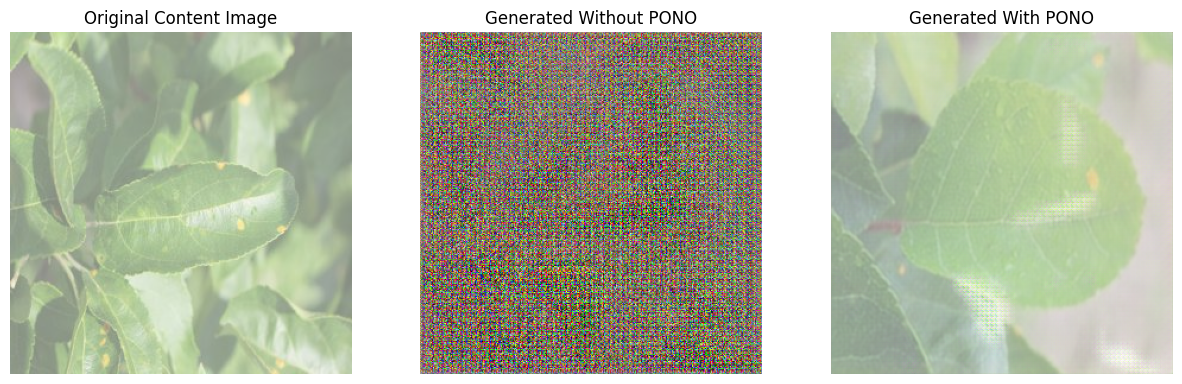

✅ Visualization Complete!


In [21]:
# ===============================================================
# Step 7: Evaluation of Full SITTA Models
# ===============================================================

import os
import glob
import torch
import torchvision.transforms as transforms
from torch_fidelity import calculate_metrics
import lpips
import matplotlib.pyplot as plt
from PIL import Image
import torchvision.models as models
import torch.nn as nn

# -------------------------
# 7.1: Define Evaluation Metrics Functions
# -------------------------

# FID Calculation function: computes the Fréchet Inception Distance (FID)
def compute_fid(real_dir, fake_dir):
    metrics = calculate_metrics(
        input1=real_dir,
        input2=fake_dir,
        fid=True,
        cuda=torch.cuda.is_available()
    )
    return metrics["frechet_inception_distance"]

# LPIPS Calculation function: computes the average LPIPS score between two directories of images.
def compute_lpips(img_dir1, img_dir2):
    transform = transforms.Compose([
        transforms.Resize((288, 288)),
        transforms.ToTensor()
    ])
    # Initialize LPIPS model (using 'alex')
    lpips_model = lpips.LPIPS(net='alex').cuda()
    lpips_scores = []
    img1_paths = sorted(glob.glob(os.path.join(img_dir1, "*.jpg")))
    img2_paths = sorted(glob.glob(os.path.join(img_dir2, "*.jpg")))
    for path1, path2 in zip(img1_paths, img2_paths):
        img1 = transform(Image.open(path1).convert("RGB")).unsqueeze(0).cuda()
        img2 = transform(Image.open(path2).convert("RGB")).unsqueeze(0).cuda()
        lpips_scores.append(lpips_model(img1, img2).item())
    return sum(lpips_scores) / len(lpips_scores)

# Define VGG Perceptual Loss (same as used during training)
class VGGLoss(nn.Module):
    def __init__(self):
        super(VGGLoss, self).__init__()
        # Use the first 16 layers of VGG19
        self.vgg = models.vgg19(pretrained=True).features[:16].eval()
        for param in self.vgg.parameters():
            param.requires_grad = False
        self.criterion = nn.L1Loss()

    def forward(self, generated, target):
        gen_features = self.vgg(generated)
        target_features = self.vgg(target).detach()
        return self.criterion(gen_features, target_features)

vgg_loss_fn = VGGLoss().cuda()

# -------------------------
# 7.2: Setup Evaluation Directories and Generate Images
# -------------------------

# Paths where you want to save evaluation images
eval_real_dir = "/kaggle/working/eval_real"
eval_fake_without_pono_dir = "/kaggle/working/eval_fake_without_pono"
eval_fake_with_pono_dir = "/kaggle/working/eval_fake_with_pono"

# Clean up any existing directories
for path in [eval_real_dir, eval_fake_without_pono_dir, eval_fake_with_pono_dir]:
    if os.path.exists(path):
        os.system(f"rm -rf {path}")
    os.makedirs(path)

# For evaluation, we'll assume that the real texture images are those from trainB_resized.
# Save a sample of real texture images (e.g., first 10 images)
real_texture_paths = sorted(glob.glob(os.path.join("/kaggle/working/dataset/leaves/trainB_resized", "*.jpg")))[:10]
for idx, path in enumerate(real_texture_paths):
    img = Image.open(path).convert("RGB")
    img.save(os.path.join(eval_real_dir, f"real_{idx}.jpg"))

# Generate images using both full SITTA models (with and without PONO)
# Make sure both generators are in eval mode.
full_generator_without_pono.eval()
full_generator_with_pono.eval()

# Use a sample of content images (from trainA_resized) for evaluation
content_paths = sorted(glob.glob(os.path.join("/kaggle/working/dataset/leaves/trainA_resized", "*.jpg")))[:10]
transform_eval = transforms.Compose([
    transforms.Resize((288, 288)),
    transforms.ToTensor(),
    # If your generator outputs images in range [-1,1], you may not normalize here.
])
content_imgs = [transform_eval(Image.open(p).convert("RGB")) for p in content_paths]
content_imgs = torch.stack(content_imgs).cuda()

# For each content image, use a fixed texture image from the real texture set (e.g., the first image)
texture_img = transform_eval(Image.open(real_texture_paths[0]).convert("RGB")).unsqueeze(0).cuda()

# Generate outputs
with torch.no_grad():
    # For the version without PONO:
    fake_imgs_without, _ = full_generator_without_pono(content_imgs, texture_img.repeat(content_imgs.size(0), 1, 1, 1))
    # For the version with PONO:
    fake_imgs_with, _ = full_generator_with_pono(content_imgs, texture_img.repeat(content_imgs.size(0), 1, 1, 1))

# Save generated images to corresponding directories
def save_generated_images(generated_images, save_dir, prefix="generated"):
    generated_images = generated_images.cpu()
    for idx, img_tensor in enumerate(generated_images):
        # Convert tensor to image (assuming range is [-1,1])
        img = transforms.ToPILImage()( (img_tensor.clamp(-1,1)+1) / 2 )
        img.save(os.path.join(save_dir, f"{prefix}_{idx}.jpg"))

save_generated_images(fake_imgs_without, eval_fake_without_pono_dir, "without_pono")
save_generated_images(fake_imgs_with, eval_fake_with_pono_dir, "with_pono")

# -------------------------
# 7.3: Compute Evaluation Metrics
# -------------------------

fid_without_pono = compute_fid(eval_real_dir, eval_fake_without_pono_dir)
fid_with_pono = compute_fid(eval_real_dir, eval_fake_with_pono_dir)
lpips_without_pono = compute_lpips(eval_real_dir, eval_fake_without_pono_dir)
lpips_with_pono = compute_lpips(eval_real_dir, eval_fake_with_pono_dir)

print("🚀 Evaluation Metrics:")
print(f"FID Without PONO: {fid_without_pono:.4f}")
print(f"LPIPS Without PONO: {lpips_without_pono:.4f}")
print(f"FID With PONO: {fid_with_pono:.4f}")
print(f"LPIPS With PONO: {lpips_with_pono:.4f}")

# Optionally, compute VGG perceptual loss on one batch (as an example)
with torch.no_grad():
    # Assume we have one batch of real texture images loaded from eval_real_dir
    sample_real = transform_eval(Image.open(os.path.join(eval_real_dir, "real_0.jpg")).convert("RGB")).unsqueeze(0).cuda()
    sample_fake_without = fake_imgs_without[0].unsqueeze(0)
    sample_fake_with = fake_imgs_with[0].unsqueeze(0)
    vgg_loss_without = vgg_loss_fn(sample_fake_without, sample_real)
    vgg_loss_with = vgg_loss_fn(sample_fake_with, sample_real)
    print(f"VGG Loss Without PONO: {vgg_loss_without.item():.4f}")
    print(f"VGG Loss With PONO: {vgg_loss_with.item():.4f}")

# -------------------------
# 7.4: Visualize the Results
# -------------------------
def visualize_results(real_img, fake_img_without, fake_img_with):
    """
    Displays a comparison between the original content image,
    the generated image without PONO, and the generated image with PONO.
    """
    real_np = real_img.squeeze(0).permute(1, 2, 0).cpu().numpy()
    fake_without_np = fake_img_without.squeeze(0).permute(1, 2, 0).cpu().numpy()
    fake_with_np = fake_img_with.squeeze(0).permute(1, 2, 0).cpu().numpy()

    # If images are in [-1,1], scale them to [0,1]
    real_np = (real_np + 1) / 2
    fake_without_np = (fake_without_np + 1) / 2
    fake_with_np = (fake_with_np + 1) / 2

    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    axes[0].imshow(real_np)
    axes[0].set_title("Original Content Image")
    axes[0].axis("off")

    axes[1].imshow(fake_without_np)
    axes[1].set_title("Generated Without PONO")
    axes[1].axis("off")

    axes[2].imshow(fake_with_np)
    axes[2].set_title("Generated With PONO")
    axes[2].axis("off")

    plt.show()
    print("✅ Visualization Complete!")

# Visualize one example (for instance, the first image in the batch)
visualize_results(content_imgs[0].unsqueeze(0), fake_imgs_without[0].unsqueeze(0), fake_imgs_with[0].unsqueeze(0))


# Step 9: Save and Export the Final Trained Model

## 9.1: Save Trained Models

In [ ]:
# Create directory for saved models
os.makedirs("/kaggle/working/sitta_models", exist_ok=True)

# Save trained models
torch.save(generator_without_pono.state_dict(), "/kaggle/working/sitta_models/generator_without_pono.pth")
torch.save(generator_with_pono.state_dict(), "/kaggle/working/sitta_models/generator_with_pono.pth")

print("✅ Models saved successfully!")


##  9.2: Reload and Test Saved Models

In [ ]:
# Load trained models for verification
loaded_gen_without_pono = SITTA_Generator(use_pono=False).cuda()
loaded_gen_without_pono.load_state_dict(torch.load("/kaggle/working/sitta_models/generator_without_pono.pth"))

loaded_gen_with_pono = SITTA_Generator(use_pono=True).cuda()
loaded_gen_with_pono.load_state_dict(torch.load("/kaggle/working/sitta_models/generator_with_pono.pth"))

print("✅ Models reloaded successfully!")

# Generate new images using the reloaded models
test_fake_B_without_pono = loaded_gen_without_pono(test_real_A).detach()
test_fake_B_with_pono = loaded_gen_with_pono(test_real_A).detach()

# Display reloaded model results
print("📊 Reloaded Model Results Comparison")
visualize_results(test_real_A, test_fake_B_without_pono)
visualize_results(test_real_A, test_fake_B_with_pono)


## 9.3: Clean Up Files to Save Space

In [ ]:
!rm -rf /kaggle/working/dataset  # Remove dataset if not needed anymore
!rm -rf /kaggle/working/1  # Remove copied repo if needed
print("✅ Cleaned up unnecessary files!")
